# BIS Policy Rates and Central Bank Total Assets

This notebook is used to work with conventional monetary policy tools, thus useful for conventional monetary policy coordination analysis

## Setup

In [ ]:
project_path = '/content/drive/MyDrive/Monetary Policy Coordination'

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append(project_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### BIS Country Codes

In [ ]:
# source: https://www.bis.org/statistics/dsd_lbs.pdf
country_code = {'AD': 'Andorra',
                'AE': 'United Arab Emirates',
                'AF': 'Afghanistan',
                'AG': 'Antigua and Barbuda',
                'AI': 'Anguilla',
                'AL': 'Albania',
                'AM': 'Armenia',
                'AO': 'Angola',
                'AR': 'Argentina',
                'AT': 'Austria',
                'AU': 'Australia',
                'AW': 'Aruba',
                'AZ': 'Azerbaijan',
                'BA': 'Bosnia and Herzegovina',
                'BB': 'Barbados',
                'BD': 'Bangladesh',
                'BE': 'Belgium',
                'BF': 'Burkina Faso',
                'BG': 'Bulgaria',
                'BH': 'Bahrain',
                'BI': 'Burundi',
                'BJ': 'Benin',
                'BM': 'Bermuda',
                'BN': 'Brunei',
                'BO': 'Bolivia',
                'BQ': 'Bonaire, Sint Eustatius and Saba',
                'BR': 'Brazil',
                'BS': 'Bahamas',
                'BT': 'Bhutan',
                'BW': 'Botswana',
                'BY': 'Belarus',
                'BZ': 'Belize',
                'CA': 'Canada',
                'CD': 'Congo Democratic Republic',
                'CF': 'Central African Republic',
                'CG': 'Congo',
                'CH': 'Switzerland',
                'CI': 'Côte d’Ivoire',
                'CL': 'Chile',
                'CM': 'Cameroon',
                'CN': 'China',
                'CO': 'Colombia',
                'CR': 'Costa Rica',
                'CU': 'Cuba',
                'CV': 'Cape Verde',
                'CW': 'Curacao',
                'CY': 'Cyprus',
                'CZ': 'Czech Republic',
                'DE': 'Germany',
                'DJ': 'Djibouti',
                'DK': 'Denmark',
                'DM': 'Dominica',
                'DO': 'Dominican Republic',
                'DZ': 'Algeria',
                'EC': 'Ecuador',
                'EE': 'Estonia',
                'EG': 'Egypt',
                'ER': 'Eritrea',
                'ES': 'Spain',
                'ET': 'Ethiopia',
                'FI': 'Finland',
                'FJ': 'Fiji',
                'FK': 'Falkland Islands (Malvinas)',
                'FM': 'Micronesia',
                'FO': 'Faeroe Islands',
                'FR': 'France',
                'GA': 'Gabon',
                'GB': 'United Kingdom',
                'GD': 'Grenada',
                'GE': 'Georgia',
                'GG': 'Guernsey',
                'GH': 'Ghana',
                'GI': 'Gibraltar',
                'GL': 'Greenland',
                'GM': 'Gambia',
                'GN': 'Guinea',
                'GQ': 'Equatorial Guinea',
                'GR': 'Greece',
                'GT': 'Guatemala',
                'GW': 'Guinea-Bissau',
                'GY': 'Guyana',
                'HK': 'Hong Kong SAR',
                'HN': 'Honduras',
                'HR': 'Croatia',
                'HT': 'Haiti',
                'HU': 'Hungary',
                'ID': 'Indonesia',
                'IE': 'Ireland',
                'IL': 'Israel',
                'IM': 'Isle of Man',
                'IN': 'India',
                'IQ': 'Iraq',
                'IR': 'Iran',
                'IS': 'Iceland',
                'IT': 'Italy',
                'JE': 'Jersey',
                'JM': 'Jamaica',
                'JO': 'Jordan',
                'JP': 'Japan',
                'KE': 'Kenya',
                'KG': 'Kyrgyz Republic',
                'KH': 'Cambodia',
                'KI': 'Kiribati',
                'KM': 'Comoros',
                'KN': 'St.Christopher/St. Kitts & Nevis',
                'KP': 'North Korea',
                'KR': '[South] Korea',
                'KW': 'Kuwait',
                'KY': 'Cayman Islands',
                'KZ': 'Kazakhstan',
                'LA': 'Laos',
                'LB': 'Lebanon',
                'LC': 'St. Lucia',
                'LI': 'Liechtenstein',
                'LK': 'Sri Lanka',
                'LR': 'Liberia',
                'LS': 'Lesotho',
                'LT': 'Lithuania',
                'LU': 'Luxembourg',
                'LV': 'Latvia',
                'LY': 'Libya',
                'MA': 'Morocco',
                'MD': 'Moldova',
                'ME': 'Montenegro',
                'MG': 'Madagascar',
                'MH': 'Marshall Islands',
                'MK': 'Macedonia FYR',
                'ML': 'Mali',
                'MM': 'Myanmar',
                'MN': 'Mongolia',
                'MO': 'Macao SAR',
                'MR': 'Mauritania',
                'MS': 'Montserrat',
                'MT': 'Malta',
                'MU': 'Mauritius',
                'MV': 'Maldives',
                'MW': 'Malawi',
                'MX': 'Mexico',
                'MY': 'Malaysia',
                'MZ': 'Mozambique',
                'NA': 'Namibia',
                'NC': 'New Caledonia',
                'NE': 'Niger',
                'NG': 'Nigeria',
                'NI': 'Nicaragua',
                'NL': 'Netherlands',
                'NO': 'Norway',
                'NP': 'Nepal',
                'NR': 'Nauru',
                'NZ': 'New Zealand',
                'OM': 'Oman',
                'PA': 'Panama',
                'PE': 'Peru',
                'PF': 'French Polynesia',
                'PG': 'Papua New Guinea',
                'PH': 'Philippines',
                'PK': 'Pakistan',
                'PL': 'Poland',
                'PS': 'Palestinian Territory',
                'PT': 'Portugal',
                'PW': 'Palau',
                'PY': 'Paraguay',
                'QA': 'Qatar',
                'RO': 'Romania',
                'RS': 'Serbia',
                'RU': 'Russia',
                'RW': 'Rwanda',
                'SA': 'Saudi Arabia',
                'SB': 'Solomon Islands',
                'SC': 'Seychelles',
                'SD': 'Sudan',
                'SE': 'Sweden',
                'SG': 'Singapore',
                'SI': 'Slovenia',
                'SK': 'Slovakia',
                'SL': 'Sierra Leone',
                'SM': 'San Marino',
                'SN': 'Senegal',
                'SO': 'Somalia',
                'SR': 'Suriname',
                'SS': 'South Sudan',
                'ST': 'Sao Tome and Principe',
                'SV': 'El Salvador',
                'SX': 'Sint Maarten',
                'SY': 'Syria',
                'SZ': 'Eswatini',
                'TC': 'Turks and Caicos Islands',
                'TD': 'Chad',
                'TF': 'French Southern Territories',
                'TG': 'Togo',
                'TH': 'Thailand',
                'TJ': 'Tajikistan',
                'TL': 'Timor Leste',
                'TM': 'Turkmenistan',
                'TN': 'Tunisia',
                'TO': 'Tonga',
                'TR': 'Turkey',
                'TT': 'Trinidad and Tobago',
                'TV': 'Tuvalu',
                'TW': 'Chinese Taipei',
                'TZ': 'Tanzania',
                'UA': 'Ukraine',
                'UG': 'Uganda',
                'US': 'United States',
                'UY': 'Uruguay',
                'UZ': 'Uzbekistan',
                'VA': 'Vatican City State',
                'VC': 'St. Vincent and the Grenadines',
                'VE': 'Venezuela',
                'VG': 'British Virgin Islands',
                'VN': 'Vietnam',
                'VU': 'Vanuatu',
                'WF': 'Wallis and Futuna',
                'WS': 'Samoa',
                'XM': 'Euro Area',
                'YE': 'Yemen',
                'ZA': 'South Africa',
                'ZM': 'Zambia',
                'ZW': 'Zimbabwe',
                }

## Years and Country lists

In [ ]:
# years to filter analysis
y0, y1 = 2002, 2023

# central banks in Processed_Data_100speeches_1997 from 2002 to 2023
selected_countries = ['AL', # bank of albania
                      'AU', # reserve bank of australia
                      'BB', # central bank of barbados
                      'CA', # bank of canada
                      'CH', # swiss national bank
                      'CL', # central bank of chile
                      'CN', # people's bank of china
                      'DE', # deutsche bundesbank
                      'DK', # national bank of denmark
                      'ES', # bank of spain
                      'FI', # bank of finland
                      'FJ', # reserve bank of fiji
                      'FR', # bank of france
                      'GB', # bank of england
                      'GR', # bank of greece
                      'HK', # hong kong monetary authority
                      'IE', # central bank of ireland
                      'IL', # bank of israel
                      'IN', # reserve bank of india
                      'IT', # bank of italy
                      'JP', # bank of japan
                      'KE', # central bank of kenya
                      'MU', # bank of mauritius
                      'MY', # central bank of malaysia
                      'NL', # netherlands bank
                      'NO', # central bank of norway
                      'NZ', # reserve bank of new zealand
                      'PH', # central bank of the philippines
                      'PK', # state bank of pakistan
                      'RS', # national bank of serbia
                      'SE', # sveriges riksbank
                      'SG', # monetary authority of singapore
                      'TH', # bank of thailand
                      'TR', # central bank of the republic of turkey
                      'TT', # central bank of trinidad and tobago
                      'UG', # bank of uganda
                      'US', # federal reserve bank of new york
                      'XM', # european central bank
                      'ZA', # south african reserve bank
                      'ZM', # bank of zambia
                      ]

g10 = ['AU', 'CA', 'CH', 'GB', 'JP', 'NO', 'NZ', 'SE', 'US', 'XM']

## Import and save BIS data

In [ ]:
# for policy rates
# urls_pol_rate = ["https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBPOL/1.0/?format=csv"]
# df_pol_rate = pd.concat([pd.read_csv(url) for url in urls_pol_rate])

https://data.bis.org/topics/CBPOL/data

```
@misc{BIS_CBPOL_data,
  author = "Bank for International Settlements",
  title = "Central bank policy rates, BIS WS_CBPOL 1.0",
  year = "2024",
  url = "https://data.bis.org/topics/CBPOL/data",
  note = "Accessed on 05 September 2024"
}
```

In [ ]:
# for central bank total assets
# urls_ta = ["https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBTA/1.0/?format=csv"]
# df_ta = pd.concat([pd.read_csv(url) for url in urls_ta])

https://data.bis.org/topics/CBTA/data

```
@misc{BIS_CBTA_data,
  author = "Bank for International Settlements",
  title = "Central bank total assets, BIS WS_CBTA 1.0",
  year = "2024",
  url = "https://data.bis.org/topics/CBTA/data",
  note = "Accessed on 05 September 2024"
}
```

In [ ]:
# save data
#df_pol_rate.to_csv(project_path + '/Data/Conventional_Coordination_Data/WS_CBPOL.csv')
#df_ta.to_csv(project_path + '/Data/Conventional_Coordination_Data/WS_CBTA.csv')

---

## Policy Rates Coordination

In [ ]:
df_pol_rate = pd.read_csv(project_path + '/Data/Conventional_Coordination_Data/WS_CBPOL.csv', index_col=0)

<ipython-input-8-bddc8bfb62be>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pol_rate = pd.read_csv(project_path + '/Conventional Coordination Data/WS_CBPOL.csv', index_col=0)


In [ ]:
df_pol_rate_clean = df_pol_rate[(df_pol_rate['FREQ'] == 'M') &
                                (df_pol_rate['TIME_PERIOD'] >= '1997-01')
                                ]
df_pol_rate_clean = df_pol_rate_clean[['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE']]
df_pol_rate_clean = df_pol_rate_clean.set_index(['REF_AREA', 'TIME_PERIOD'])
df_pol_rate_clean

OBS_VALUE
REF_AREA TIME_PERIOD           
BE       1997-01           4.25
         1997-02           4.25
         1997-03           4.25
         1997-04           4.25
         1997-05           4.25
...                         ...
AU       2024-04           4.35
         2024-05           4.35
         2024-06           4.35
         2024-07           4.35
         2024-08           4.35

[12385 rows x 1 columns]

In [ ]:
df_policy_change = df_pol_rate_clean.groupby('REF_AREA').diff().dropna()
df_policy_change = df_policy_change.reset_index().pivot(index='TIME_PERIOD', columns='REF_AREA', values='OBS_VALUE')
df_policy_change

REF_AREA,AR,AU,BE,BR,CA,CH,CL,CN,CO,CZ,...,RO,RS,RU,SA,SE,TH,TR,US,XM,ZA
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
1997-02,0.31,0.0,0.0,4.62,0.00,0.00,NaN,0.0,0.0,0.00,...,NaN,9.59,-6.0,NaN,0.00,NaN,NaN,0.00,NaN,0.0
1997-03,0.70,0.0,0.0,-2.16,0.00,0.00,0.00,0.0,-4.5,0.00,...,NaN,-43.76,0.0,NaN,0.00,NaN,NaN,0.25,NaN,0.0
1997-04,-0.80,0.0,0.0,-3.06,0.00,0.00,-0.25,0.0,0.0,0.00,...,NaN,1.30,-6.0,NaN,0.00,NaN,NaN,0.00,NaN,0.0
1997-05,0.63,-0.5,0.0,1.14,0.00,0.00,0.00,0.0,-1.0,0.00,...,NaN,-1.30,0.0,NaN,0.00,NaN,NaN,0.00,NaN,0.0
1997-06,-0.31,0.0,0.0,-1.14,0.25,0.00,-0.25,0.0,0.0,5.80,...,NaN,1.30,-12.0,NaN,0.00,NaN,NaN,0.00,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04,-20.00,0.0,NaN,0.00,0.00,0.00,-0.75,0.0,0.0,0.00,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0
2024-05,-20.00,0.0,NaN,-0.25,0.00,0.00,-0.50,0.0,-0.5,-0.50,...,0.00,0.00,0.0,0.0,-0.25,0.0,0.0,0.00,0.00,0.0
2024-06,0.00,0.0,NaN,0.00,-0.25,-0.25,-0.25,0.0,0.0,-0.50,...,0.00,-0.25,0.0,0.0,0.00,0.0,0.0,0.00,-0.25,0.0


<Axes: xlabel='TIME_PERIOD', ylabel='REF_AREA'>

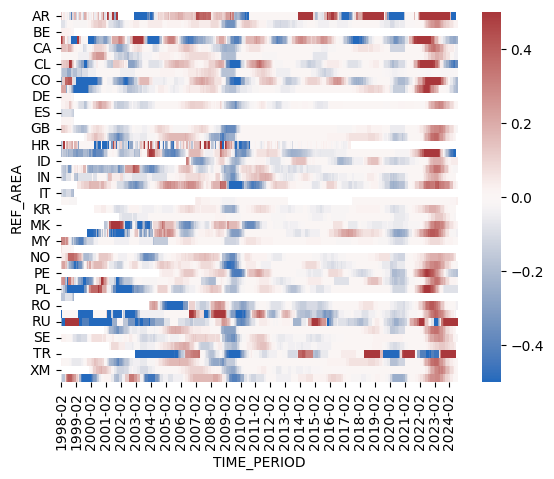

In [ ]:
# 1Y moving avarage for policy "momentum"
df_policy_evol = df_policy_change.rolling(12).mean().iloc[12:].T
sns.heatmap(df_policy_evol, cmap='vlag', annot=False, vmin=-.5, vmax=.5)

<Axes: xlabel='TIME_PERIOD', ylabel='REF_AREA'>

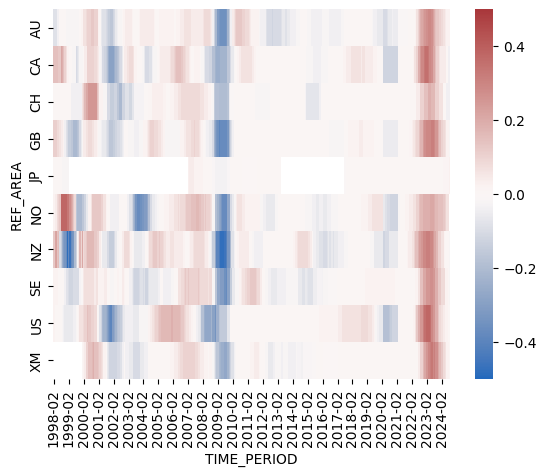

In [ ]:
sns.heatmap(df_policy_evol.loc[g10], cmap='vlag', annot=False, vmin=-.5, vmax=.5)

<Axes: xlabel='TIME_PERIOD', ylabel='REF_AREA'>

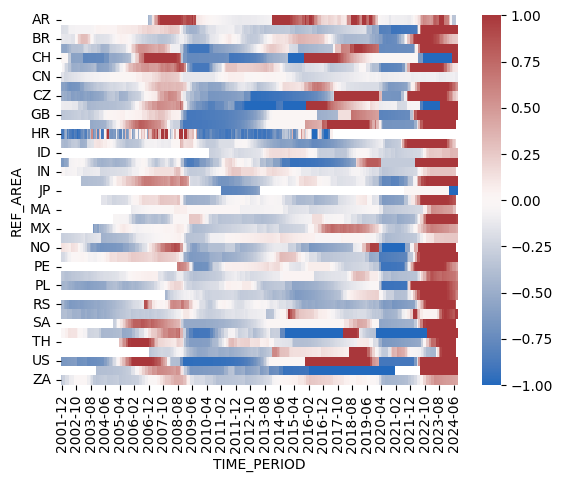

In [ ]:
# policy rate level, trying to proxy neutral rate by rolling histirical mean
country_rates = df_pol_rate_clean.reset_index().pivot(index='TIME_PERIOD', columns='REF_AREA', values='OBS_VALUE')
rolling_rates = country_rates.rolling(60)

#policy_level = (country_rates - rolling_rates.mean()) / rolling_rates.std() # z score like
policy_level = (country_rates - rolling_rates.mean()) / rolling_rates.mean() # % from "neutral"
policy_level = policy_level.dropna(axis=1, how='all').dropna(axis=0, how='all')

sns.heatmap(policy_level.T, cmap='vlag', annot=False, vmin=-1, vmax=1)

<Axes: xlabel='TIME_PERIOD', ylabel='REF_AREA'>

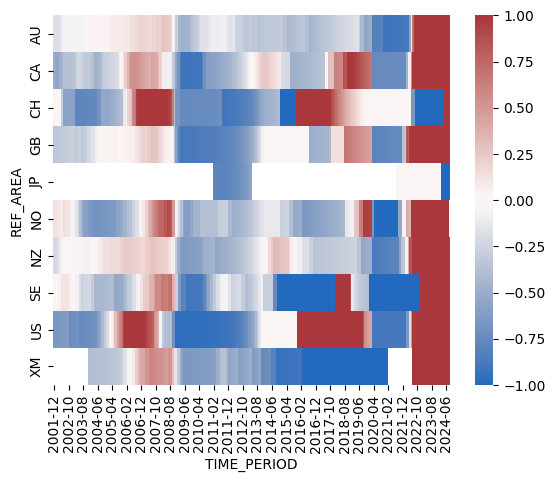

In [ ]:
sns.heatmap(policy_level.T.loc[g10], cmap='vlag', annot=False, vmin=-1, vmax=1)

---

## QE/QT Coordination

In [ ]:
df_ta = pd.read_csv(project_path + '/Data/Conventional_Coordination_Data/WS_CBTA.csv', index_col=0)

### Dataset investigation

In [ ]:
df_ta.columns

Index(['FREQ', 'REF_AREA', 'COMP_METHOD', 'UNIT_MEASURE', 'CURRENCY',
       'TRANSFORMATION', 'COMMENT_DSET', 'DATA_COMP', 'METHOD_REF',
       'COLLECTION_DETAIL', 'COMMENT_TS', 'DECIMALS', 'UNIT_MULT', 'BREAKS',
       'SUPP_INFO_BREAKS', 'COMPILING_ORG', 'DISS_ORG', 'TITLE', 'TIME_FORMAT',
       'COLLECTION', 'TIME_PERIOD', 'OBS_VALUE', 'FISCAL_YEAR', 'CONF_STATUS',
       'OBS_STATUS', 'OBS_PRE_BREAK'],
      dtype='object')

In [ ]:
# 52 countries, all with FREQ == 'M'
# 51 countries with 'UNIT_MEASURE' == 'USD', only 'US' with 'XDC' only. It should be converted to 'USD' (get TRANFORMATION = 'N')
df_ta[(df_ta['REF_AREA'] == 'US')].groupby(['TITLE', 'UNIT_MEASURE', 'FREQ', 'TRANSFORMATION'])['OBS_VALUE'].count()

TITLE                                                                     UNIT_MEASURE  FREQ  TRANSFORMATION
United States - Central bank, assets, total, BIS-spliced                  XDC           A     N                  110
                                                                                        M     N                 1317
                                                                                        Q     N                  439
United States - Central bank, assets, total, BIS-spliced, GDP             XDF_R_B1GQ    A     B                   77
                                                                                        Q     B                  307
United States - Central bank, assets, total, BIS-spliced, break-adjusted  XDC           A     B                  110
                                                                                        M     B                 1317
                                                                                        Q     B                  439
Name: OBS_VALUE, dtype: int64

### Coordination Analysis

In [ ]:
df_ta_clean = df_ta[(df_ta['FREQ'] == 'Q') &
                    (df_ta['TIME_PERIOD'] >= '1997-Q1') &
                    (df_ta['UNIT_MEASURE'] == 'XDF_R_B1GQ')
                    ] # quarterly, percentage of GDP

# df_ta_clean = df_ta[(df_ta['FREQ'] == 'Q') &
#                     (df_ta['TIME_PERIOD'] >= '1997-Q1') &
#                     ((df_ta['UNIT_MEASURE'] == 'USD') |
#                      ((df_ta['REF_AREA'] == 'US') &
#                       (df_ta['UNIT_MEASURE'] == 'XDC') &
#                       (df_ta['TRANSFORMATION'] == 'B')
#                       )
#                      )
#                     ] # quarterly, USD

df_ta_clean = df_ta_clean[['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE']]
df_ta_clean = df_ta_clean.set_index(['REF_AREA', 'TIME_PERIOD'])
df_ta_clean

OBS_VALUE
REF_AREA TIME_PERIOD           
TH       1997-Q1      20.543565
         1997-Q2      21.695792
         1997-Q3      30.363153
         1997-Q4      35.294415
         1998-Q1      33.401548
...                         ...
ID       2023-Q1      19.278526
         2023-Q2      18.418332
         2023-Q3      18.034987
         2023-Q4      18.940780
         2024-Q1      18.664202

[5274 rows x 1 columns]

In [ ]:
df_qe_qt = df_ta_clean.groupby('REF_AREA').diff().dropna()
df_qe_qt = df_qe_qt.reset_index().pivot(index='TIME_PERIOD', columns='REF_AREA', values='OBS_VALUE')
df_qe_qt

REF_AREA,AE,AR,AT,AU,BE,BR,CA,CH,CL,CN,...,SA,SE,SG,SI,SK,TH,TR,US,XM,ZA
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
1997-Q2,NaN,NaN,0.008450,1.024149,NaN,0.458276,0.161931,-0.062983,NaN,NaN,...,NaN,NaN,-0.927115,1.886081,NaN,1.152227,-0.622244,0.086323,NaN,-0.133860
1997-Q3,NaN,NaN,0.090628,-1.132681,NaN,0.018851,-0.067523,-0.208957,NaN,NaN,...,NaN,NaN,-0.426038,2.180289,NaN,8.667361,1.499749,-0.097242,NaN,0.550541
1997-Q4,NaN,NaN,-0.141601,0.046566,NaN,-0.844046,0.089997,1.107532,NaN,NaN,...,NaN,NaN,-0.771042,-0.005656,NaN,4.931262,2.328219,0.307820,NaN,0.632754
1998-Q1,NaN,NaN,0.081262,-0.202917,NaN,6.063137,-0.286292,-0.714530,NaN,NaN,...,NaN,NaN,-0.422494,-0.324658,NaN,-1.892867,-2.985939,-0.286209,NaN,-0.312865
1998-Q2,NaN,0.226176,-0.745442,0.794967,NaN,1.322847,0.251061,1.365379,NaN,NaN,...,NaN,NaN,1.300658,1.259181,NaN,3.977720,1.082105,0.092039,NaN,0.968772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-Q2,3.234122,1.543991,-4.359516,-1.630175,-1.301345,-1.237709,-0.899621,-9.079535,-0.378149,-0.664803,...,0.719822,-2.754294,6.421795,0.668689,-2.273902,0.569458,3.988329,-1.848845,-4.546188,0.637248
2023-Q3,NaN,5.231402,-0.655885,-2.719721,-1.816370,-0.772307,-1.252946,-8.373274,1.739736,0.415260,...,0.523505,-0.895578,2.289959,2.607589,-1.425114,0.200462,1.382600,-1.726255,-1.819060,-0.272398
2023-Q4,NaN,33.985078,-0.050988,-0.337603,-7.275152,1.143364,-0.347280,-3.743338,0.873007,1.978713,...,-0.278985,-1.847893,1.090905,-2.007561,-2.640144,-1.261806,-0.493977,-1.477050,-1.534688,-0.323750


<Axes: xlabel='TIME_PERIOD', ylabel='REF_AREA'>

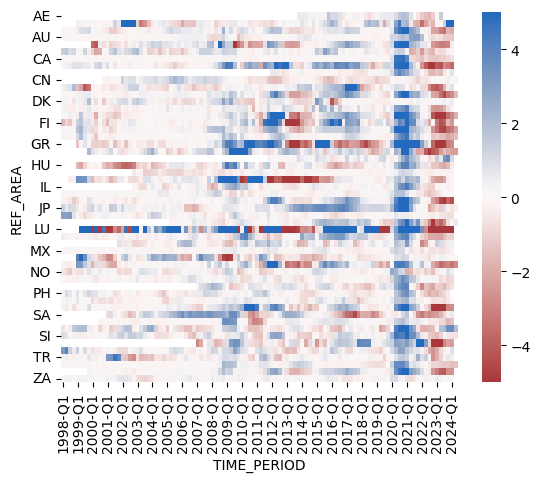

In [ ]:
# 1Y moving avarage for policy "momentum"
df_qe_qt_evol = df_qe_qt.rolling(4).mean().iloc[3:].T
sns.heatmap(df_qe_qt_evol, cmap='vlag_r', annot=False, vmin=-5, vmax=5)

<Axes: xlabel='TIME_PERIOD', ylabel='REF_AREA'>

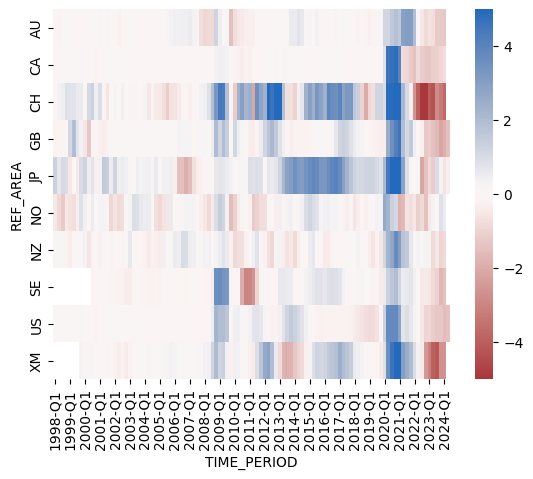

In [ ]:
sns.heatmap(df_qe_qt_evol.loc[g10], cmap='vlag_r', annot=False, vmin=-5, vmax=5)

---

## Data alignment validation

In [ ]:
valid = pd.DataFrame(df_pol_rate['REF_AREA'].unique()).merge(pd.DataFrame(df_ta['REF_AREA'].unique()),
                                                     how='outer',
                                                     indicator=True
                                                     )
valid['Country'] = valid[0].map(country_code)
valid[valid['_merge'] != 'both']

,0,_merge,Country
0,AE,right_only,United Arab Emirates
2,AT,right_only,Austria
10,CO,left_only,Colombia
14,EE,right_only,Estonia
16,FI,right_only,Finland
19,GR,right_only,Greece
24,IE,right_only,Ireland
27,IS,left_only,Iceland
31,LT,right_only,Lithuania
32,LU,right_only,Luxembourg


---

# Analysis

## Evolution

### Preparation

In [ ]:
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(9, 7)})

In [ ]:
def plot_similarity_evolution_conv(input_df, policy_level=False):

  df_for_correl = (input_df
                  .T
                  .reset_index()
                  .assign(Date = lambda x: x.Date.str[:4])
                  .set_index('Date')
                  .loc['1998':]
                  )

  qs = []
  years = df_for_correl.index.unique().to_list()
  # loop_windows = [(a, b) for a, b in zip(years[::2], years[::2])] # every two years
  # loop_windows = [(a, b) for a, b in zip(years[::], years[::])] # every year
  if policy_level:
    loop_windows = [(a, b) for a, b in zip(years[1:-1:2], years[2::2])] # every couple of years / 2002 - 2023 for policy_level
    pal = sns.cubehelix_palette(len(loop_windows), start=2.10, rot=0., light=0.7)
  else:
    loop_windows = [(a, b) for a, b in zip(years[4:-1:2], years[5::2])] # every couple of years: 2002 - 2023
    pal = sns.cubehelix_palette(len(loop_windows), start=.8, rot=.1, light=0.7)
  windows = [f'{a}-{b}' for a, b in loop_windows]
  for y_1, y_2 in loop_windows:
    df_y = df_for_correl.loc[y_1:y_2].dropna(axis=1)
    for c_1 in df_y:
      for c_2 in df_y:
        correl = pearsonr(df_y[c_1], df_y[c_2])
        if c_1 != c_2 and correl[1] < 0.05 and correl[0] > 0:
          qs.append([f'{y_1}-{y_2}', correl[0]])

  q_df = pd.DataFrame(qs, columns=['window', 'q'])
  mean_series = q_df.groupby('window')['q'].mean()
  q_df['mean_q'] = q_df['window'].map(mean_series)

  sns.set_theme(style='white', rc={"axes.facecolor": (0, 0, 0, 0)})
  #pal = sns.cubehelix_palette(len(windows), rot=-.25, light=.7)
  #pal = sns.cubehelix_palette(len(windows), start=.80, rot=.1, light=0.7, hue=.8)
  #pal = sns.dark_palette("#69d", reverse=True, n_colors=len(windows))
  #pal = sns.cubehelix_palette(len(windows), start=.5, rot=-.5)
  #pal = sns.color_palette(palette='Blues', n_colors=len(windows))

  g = sns.FacetGrid(q_df, row='window', hue='mean_q', aspect=15,
                    height=0.5, palette=pal)
  g.map(sns.kdeplot, 'q',
        bw_adjust=0.5, clip_on=False,
        fill=True, alpha=1)
  g.map(sns.kdeplot, 'q',
        bw_adjust=0.5, clip_on=False,
        color='white', lw=1)
  g.map(plt.axhline, y=0,
        lw=2, clip_on=False)

  for i, ax in enumerate(g.axes.flat):
      ax.text(0.02, 1, windows[i],
              fontweight='bold', fontsize=10,
              color=ax.lines[-1].get_color())

  g.figure.subplots_adjust(hspace=-0.3)
  g.set_titles('')
  g.set(yticks=[], ylabel='', xlim=(0, 1))
  g.despine(bottom=True, left=True)
  g.set_xticklabels([0,0.2,0.4,0.6,0.8,1])

  plt.setp(ax.get_xticklabels(), fontsize=10, fontweight='bold')
  plt.xlabel('q', fontweight='bold', fontsize=10)

  plt.show()
  return mean_series

---

### Policy Evol

Use policy level!

In [ ]:
select_policy_evol = []
not_in_policy_evol = []

for c in selected_countries:
  if c in df_policy_evol.index:
    select_policy_evol.append(c)
  else:
    not_in_policy_evol.append(c)
print('Not found:')
print(not_in_policy_evol)
selected_policy_evol = df_policy_evol.loc[select_policy_evol, :f'{y1}-12'].dropna(how='all')
selected_policy_evol.columns = selected_policy_evol.columns.rename('Date')
#selected_policy_evol

Not found:
['AL', 'BB', 'FI', 'FJ', 'GR', 'IE', 'KE', 'MU', 'PK', 'SG', 'TT', 'UG', 'ZM']


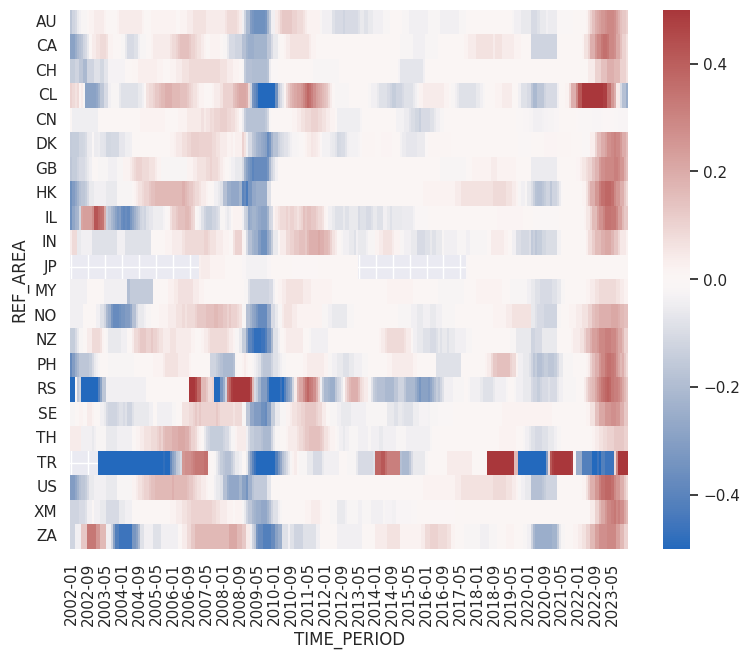

In [ ]:
sns.heatmap(selected_policy_evol.loc[:, f'{y0}-01':f'{y1}-12'].dropna(how='all'),
            cmap='vlag', annot=False, vmin=-.5, vmax=.5)
plt.yticks(rotation=0)
plt.show()

<ipython-input-24-62364cdc8ef3>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correl = pearsonr(df_y[c_1], df_y[c_2])
<ipython-input-24-62364cdc8ef3>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correl = pearsonr(df_y[c_1], df_y[c_2])
<ipython-input-24-62364cdc8ef3>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correl = pearsonr(df_y[c_1], df_y[c_2])
<ipython-input-24-62364cdc8ef3>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correl = pearsonr(df_y[c_1], df_y[c_2])
<ipython-input-24-62364cdc8ef3>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correl = pearsonr(df_y[c_1], df_y[c_2])
<ipython-input-24-62364cdc8ef3>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correl =

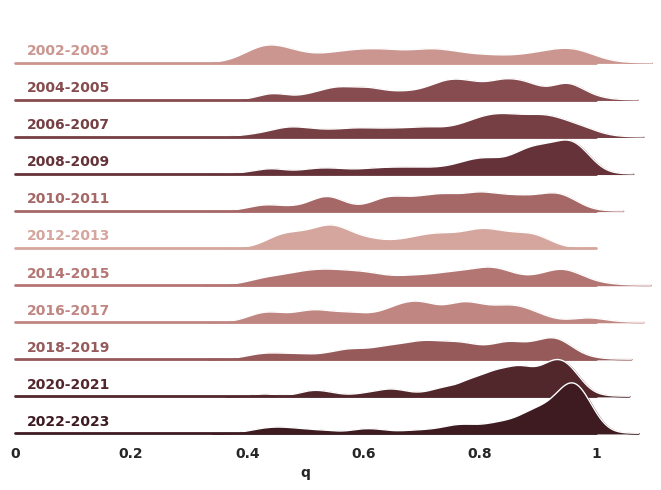

,q
window,
2002-2003,0.680505
2004-2005,0.750745
2006-2007,0.761686
2008-2009,0.817430
2010-2011,0.734247
2012-2013,0.674522
2014-2015,0.708910
2016-2017,0.696673
2018-2019,0.743526


In [ ]:
#plot_similarity_evolution_conv(df_policy_evol)
plot_similarity_evolution_conv(selected_policy_evol)

---

### QE/QT Evol

In [ ]:
select_qe_qt_evol = []
not_in_qe_qt_evol = []

for c in selected_countries:
  if c in df_qe_qt_evol.index:
    select_qe_qt_evol.append(c)
  else:
    not_in_qe_qt_evol.append(c)
print('Not found:')
print(not_in_qe_qt_evol)
selected_qe_qt_evol = df_qe_qt_evol.loc[select_qe_qt_evol, :f'{y1}-Q4'].dropna(how='all')
selected_qe_qt_evol.index = selected_qe_qt_evol.index.rename('Country')
selected_qe_qt_evol.columns = selected_qe_qt_evol.columns.rename('Date')
#selected_qe_qt_evol

Not found:
['AL', 'BB', 'FJ', 'KE', 'MU', 'PK', 'RS', 'TT', 'UG', 'ZM']


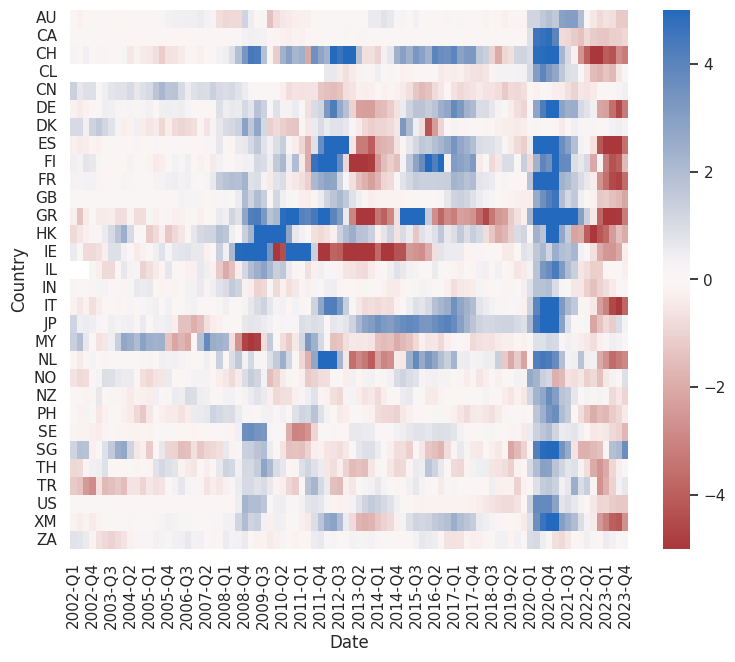

In [ ]:
sns.heatmap(selected_qe_qt_evol.loc[:, f'{y0}-Q1':f'{y1}-Q4'].dropna(how='all'),
            cmap='vlag_r', annot=False, vmin=-5, vmax=5)
plt.yticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


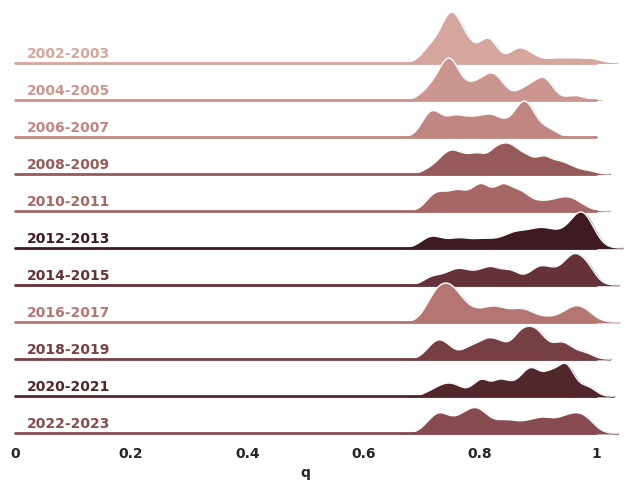

,q
window,
2002-2003,0.796654
2004-2005,0.808908
2006-2007,0.809834
2008-2009,0.835098
2010-2011,0.829700
2012-2013,0.885549
2014-2015,0.872839
2016-2017,0.817169
2018-2019,0.849139


In [ ]:
#plot_similarity_evolution_conv(df_qe_qt_evol)
plot_similarity_evolution_conv(selected_qe_qt_evol)

### Policy Level

In [ ]:
select_policy_level = []
not_in_policy_level = []

for c in selected_countries:
  if c in policy_level.T.index:
    select_policy_level.append(c)
  else:
    not_in_policy_level.append(c)
print('Not found:')
print(not_in_policy_level)
selected_policy_level = policy_level.T.loc[select_policy_level, :f'{y1}-12'].dropna(how='all')
selected_policy_level.index = selected_policy_level.index.rename('Country')
selected_policy_level.columns = selected_policy_level.columns.rename('Date')
#selected_policy_level

Not found:
['AL', 'BB', 'DE', 'ES', 'FI', 'FJ', 'FR', 'GR', 'IE', 'IT', 'KE', 'MU', 'NL', 'PK', 'SG', 'TT', 'UG', 'ZM']


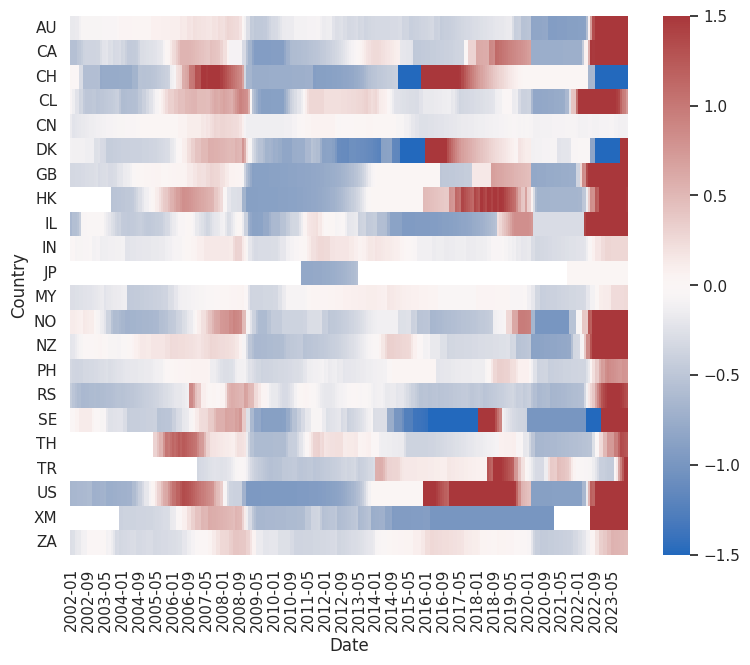

In [ ]:
sns.heatmap(selected_policy_level.loc[:, f'{y0}-01':f'{y1}-12'].dropna(how='all'),
            cmap='vlag', annot=False, vmin=-1.5, vmax=1.5)
plt.yticks(rotation=0)
plt.show()

<ipython-input-24-62364cdc8ef3>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correl = pearsonr(df_y[c_1], df_y[c_2])
<ipython-input-24-62364cdc8ef3>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correl = pearsonr(df_y[c_1], df_y[c_2])
<ipython-input-24-62364cdc8ef3>:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correl = pearsonr(df_y[c_1], df_y[c_2])
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/l

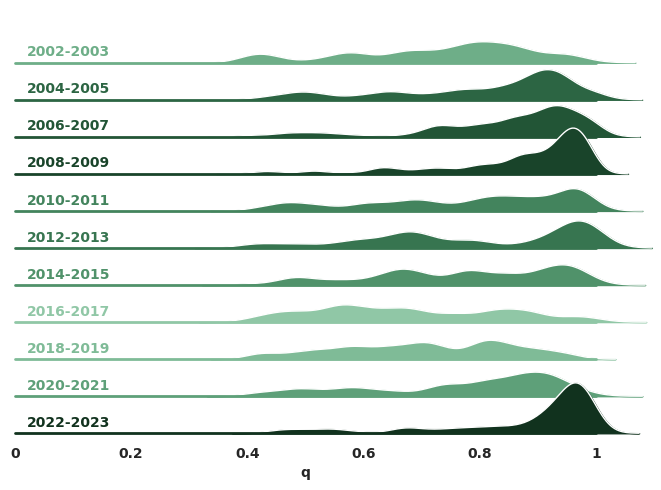

,q
window,
2002-2003,0.728593
2004-2005,0.799863
2006-2007,0.842098
2008-2009,0.866312
2010-2011,0.775743
2012-2013,0.788649
2014-2015,0.767591
2016-2017,0.679805
2018-2019,0.704431


In [ ]:
#plot_similarity_evolution_conv(policy_level.T, policy_level=True)
plot_similarity_evolution_conv(selected_policy_level, policy_level=True)